## 개요
* 데이터 정리용 주피터 노트북
* 너무 큰 데이터의 경우 여기서 한번 편집 후 project.ipynb로 넘길 예정

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## 데이터 (1)

In [3]:
precip = pd.read_csv("./dataOrigin/rn_20241123.csv", skiprows=7, encoding='cp949')

In [4]:
precip.head(10)

,날짜,지점,강수량(mm)
0,2015-01-01,108,NaN
1,2015-01-02,108,NaN
2,2015-01-03,108,NaN
3,2015-01-04,108,0.0
4,2015-01-05,108,0.4
5,2015-01-06,108,3.0
6,2015-01-07,108,NaN
7,2015-01-08,108,NaN
8,2015-01-09,108,NaN
9,2015-01-10,108,NaN


In [5]:
# 지점 삭제
precip = precip.drop(labels=('지점'), axis=1)

# 이름 변경
precip['강수량'] = precip['강수량(mm)']
precip = precip.drop(labels=('강수량(mm)'), axis=1)

# fillna
precip['강수량'] = precip['강수량'].fillna(0)

# 날짜 변경
precip['날짜'] = pd.to_datetime(precip['날짜'])

In [6]:
len(precip[precip['강수량'] == np.nan])

0

In [ ]:
import platform
import matplotlib as mat

if platform.system() == 'Darwin':
    mat.rc('font', family='AppleGothic')

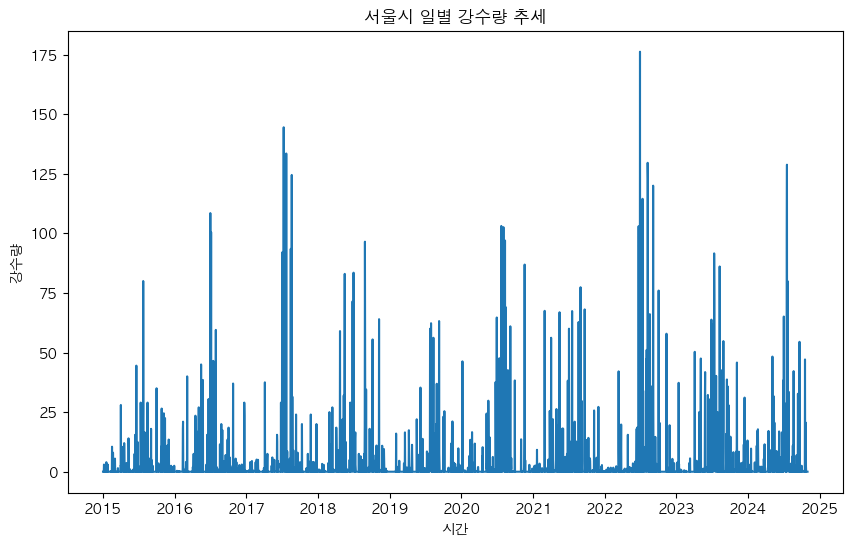

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(precip['날짜'], precip['강수량'])
plt.title("서울시 일별 강수량 추세")
plt.xlabel('시간')
plt.ylabel('강수량')
plt.show()

In [63]:
precip_info = precip[precip['강수량'] != 0].describe()
round(precip_info, 4)

,날짜,강수량
count,1052,1052.0000
mean,2020-01-09 08:57:56.806083840,12.0245
min,2015-01-05 00:00:00,0.1000
25%,2017-07-15 18:00:00,0.7000
50%,2020-02-15 12:00:00,3.3000
75%,2022-07-13 06:00:00,12.7000
max,2024-10-23 00:00:00,176.2000
std,NaN,21.2737


In [64]:
print(f"{len(precip[precip['강수량'] >= 30])} / {len(precip)}")

130 / 3592


In [65]:
precip.tail(10)

,날짜,강수량
3582,2024-10-22,20.6
3583,2024-10-23,2.3
3584,2024-10-24,0.0
3585,2024-10-25,0.0
3586,2024-10-26,0.0
3587,2024-10-27,0.0
3588,2024-10-28,0.0
3589,2024-10-29,0.0
3590,2024-10-30,0.0
3591,2024-10-31,0.0


In [ ]:
time = pd.read_csv("./dataOrigin/FCT_WRN2.csv", delimiter=' ')

In [67]:
time.head(5)

,발표시각,발표시간
0,2015-01-02,07:00
1,2015-01-02,09:20
2,2015-01-18,18:30
3,2015-01-18,19:10
4,2015-01-18,20:00


In [68]:
time = time.drop(labels='발표시간', axis=1)
time['발표시각'] = pd.to_datetime(time['발표시각'])

In [69]:
time['발표시각'].head(10)

0   2015-01-02
1   2015-01-02
2   2015-01-18
3   2015-01-18
4   2015-01-18
5   2015-01-18
6   2015-01-19
7   2015-06-20
8   2015-06-20
9   2015-06-20
Name: 발표시각, dtype: datetime64[ns]

In [70]:
time['날짜'] = time['발표시각'].dt.date
time_unique = time.drop_duplicates(subset='날짜')
time['발표시각'] = time_unique.drop(columns=['날짜'])
time['발표시각'].head(10)

0   2015-01-02
1          NaT
2   2015-01-18
3          NaT
4          NaT
5          NaT
6   2015-01-19
7   2015-06-20
8          NaT
9          NaT
Name: 발표시각, dtype: datetime64[ns]

In [71]:
time = time.dropna(subset=['발표시각'])
time = time.drop(labels='발표시각', axis=1)

time['날짜'] = pd.to_datetime(time['날짜'])

In [72]:
time['체크'] = 1
time.head(10)

,날짜,체크
0,2015-01-02,1
2,2015-01-18,1
6,2015-01-19,1
7,2015-06-20,1
10,2015-07-11,1
12,2015-07-12,1
15,2015-07-23,1
17,2015-07-24,1
23,2015-07-25,1
33,2015-07-26,1


In [73]:
precip.head(10)

,날짜,강수량
0,2015-01-01,0.0
1,2015-01-02,0.0
2,2015-01-03,0.0
3,2015-01-04,0.0
4,2015-01-05,0.4
5,2015-01-06,3.0
6,2015-01-07,0.0
7,2015-01-08,0.0
8,2015-01-09,0.0
9,2015-01-10,0.0


In [74]:
merged_df = pd.merge(time, precip, on='날짜', how='outer')
merged_df['체크'] = merged_df['체크'].fillna(0)

In [75]:
merged_df.head(10)

,날짜,체크,강수량
0,2015-01-01,0.0,0.0
1,2015-01-02,1.0,0.0
2,2015-01-03,0.0,0.0
3,2015-01-04,0.0,0.0
4,2015-01-05,0.0,0.4
5,2015-01-06,0.0,3.0
6,2015-01-07,0.0,0.0
7,2015-01-08,0.0,0.0
8,2015-01-09,0.0,0.0
9,2015-01-10,0.0,0.0


In [76]:
merged_df.to_csv("temp.csv")

In [77]:
print(len(merged_df[(merged_df['강수량'] != 0) & (merged_df['체크'] == 1)]))
print(len(merged_df[(merged_df['강수량'] != 0) & (merged_df['체크'] == 0)]))
print(len(merged_df[(merged_df['강수량'] == 0)]))

320
732
2540


In [78]:
# 조건 정의
conditions = [
    (merged_df['강수량'] != 0) & (merged_df['체크'] == 1),   # 제일 많이 옴
    (merged_df['강수량'] != 0) & (merged_df['체크'] == 0),   # 중간
    (merged_df['강수량'] == 0)                              # 안 옴.
]

# 각 조건에 해당하는 값
values = [2, 1, 0]

# 조건에 따라 'type' 열 생성
merged_df['type'] = np.select(conditions, values, default=np.nan)

print(merged_df)

             날짜   체크  강수량  type
0    2015-01-01  0.0  0.0   0.0
1    2015-01-02  1.0  0.0   0.0
2    2015-01-03  0.0  0.0   0.0
3    2015-01-04  0.0  0.0   0.0
4    2015-01-05  0.0  0.4   1.0
...         ...  ...  ...   ...
3587 2024-10-27  0.0  0.0   0.0
3588 2024-10-28  0.0  0.0   0.0
3589 2024-10-29  0.0  0.0   0.0
3590 2024-10-30  0.0  0.0   0.0
3591 2024-10-31  0.0  0.0   0.0

[3592 rows x 4 columns]


In [79]:
print(len(merged_df[merged_df['type'] == 2]))
print(len(merged_df[merged_df['type'] == 1]))
print(len(merged_df[merged_df['type'] == 0]))

320
732
2540


In [80]:
merged_df.head()

,날짜,체크,강수량,type
0,2015-01-01,0.0,0.0,0.0
1,2015-01-02,1.0,0.0,0.0
2,2015-01-03,0.0,0.0,0.0
3,2015-01-04,0.0,0.0,0.0
4,2015-01-05,0.0,0.4,1.0


In [81]:
merged_df = merged_df.drop(labels=['체크', '강수량'], axis=1)

In [82]:
merged_df.head(10)

,날짜,type
0,2015-01-01,0.0
1,2015-01-02,0.0
2,2015-01-03,0.0
3,2015-01-04,0.0
4,2015-01-05,1.0
5,2015-01-06,1.0
6,2015-01-07,0.0
7,2015-01-08,0.0
8,2015-01-09,0.0
9,2015-01-10,0.0


In [83]:
merged_df.index.name = 'index'

In [ ]:
merged_df.to_csv("./dataProcessed/precipitation.csv", index='false')

## 데이터 (2)

In [ ]:
temperature = pd.read_csv("./dataOrigin/ta_20241123.csv", skiprows=7, encoding='cp949')

temperature['평균기온'] = temperature['평균기온(℃)']
temperature['최고기온'] = temperature['최고기온(℃)']
temperature['최저기온'] = temperature['최저기온(℃)']

temperature = temperature.drop(labels='지점', axis=1)

In [90]:
temperature.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),평균기온,최고기온,최저기온
0,\t2015-01-01,-7.7,-9.8,-4.3,-7.7,-4.3,-9.8
1,\t2015-01-02,-6.0,-9.0,-1.9,-6.0,-1.9,-9.0
2,\t2015-01-03,-2.7,-9.2,3.1,-2.7,3.1,-9.2
3,\t2015-01-04,2.5,0.2,8.5,2.5,8.5,0.2
4,\t2015-01-05,3.7,-1.1,7.9,3.7,7.9,-1.1


In [91]:
temperature = temperature.drop(temperature.columns[1:4], axis=1)
temperature.head(10)

,날짜,평균기온,최고기온,최저기온
0,\t2015-01-01,-7.7,-4.3,-9.8
1,\t2015-01-02,-6.0,-1.9,-9.0
2,\t2015-01-03,-2.7,3.1,-9.2
3,\t2015-01-04,2.5,8.5,0.2
4,\t2015-01-05,3.7,7.9,-1.1
5,\t2015-01-06,-3.2,4.0,-7.6
6,\t2015-01-07,-5.5,-0.6,-8.9
7,\t2015-01-08,-5.1,-0.2,-9.5
8,\t2015-01-09,-2.1,3.5,-6.8
9,\t2015-01-10,-0.3,4.8,-5.6


In [ ]:
temperature.to_csv("./dataProcessed/temperature.csv")

In [4]:
temperature = pd.read_csv("./dataProcessed/temperature.csv")

In [5]:
mpl.rcParams['axes.unicode_minus'] = False

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_45180/1387243410.py:12: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 자동 조정
/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_45180/1387243410.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 자동 조정
/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_45180/1387243410.py:12: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 자동 조정
/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_45180/1387243410.py:12: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 자동 조정
/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_45180/1387243410.py:12: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 

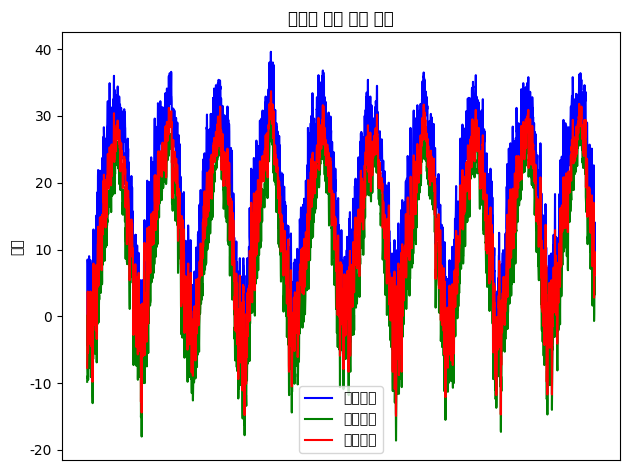

In [6]:
plt.title("서울시 기온 변화 추세")

plt.plot(temperature['날짜'], temperature['최고기온'], color='blue')
plt.plot(temperature['날짜'], temperature['최저기온'], color='green')
plt.plot(temperature['날짜'], temperature['평균기온'], color='red')

plt.xlabel('시간')
plt.ylabel('온도')
plt.legend(('최고기온', '최저기온', '평균기온'))
plt.gca().axes.get_xaxis().set_visible(False)

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [15]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   3614 non-null   int64  
 1   날짜      3614 non-null   object 
 2   평균기온    3614 non-null   float64
 3   최고기온    3614 non-null   float64
 4   최저기온    3614 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 141.3+ KB


In [7]:
temperature.describe()

,index,평균기온,최고기온,최저기온
count,3614.000000,3614.000000,3613.000000,3613.000000
mean,1806.500000,13.750249,18.612593,9.638721
std,1043.416264,10.596836,10.657136,10.815563
min,0.000000,-14.900000,-10.700000,-18.600000
25%,903.250000,4.900000,9.500000,0.600000
50%,1806.500000,14.900000,20.400000,10.400000
75%,2709.750000,23.100000,27.700000,19.100000
max,3613.000000,33.700000,39.600000,30.300000


In [14]:
temperature.isnull().sum()

index    0
날짜       0
평균기온     0
최고기온     0
최저기온     0
dtype: int64

In [12]:
import pandas as pd
import numpy as np

# 결측치를 앞/뒤 값의 평균으로 채우는 함수
def fill_missing_with_mean(series):
    for i in range(len(series)):
        if pd.isna(series[i]):  # 결측치 확인
            # 앞 값과 뒤 값 가져오기
            prev_value = series[i - 1] if i > 0 else None
            next_value = series[i + 1] if i < len(series) - 1 else None
            
            # 앞/뒤 값의 평균 계산 (둘 중 하나만 존재하는 경우 그 값을 사용)
            if pd.notna(prev_value) and pd.notna(next_value):
                series[i] = (prev_value + next_value) / 2
            elif pd.notna(prev_value):
                series[i] = prev_value
            elif pd.notna(next_value):
                series[i] = next_value
    return series

# 데이터프레임의 결측치 처리
temperature['최고기온'] = fill_missing_with_mean(temperature['최고기온'].tolist())
temperature['최저기온'] = fill_missing_with_mean(temperature['최저기온'].tolist())

In [13]:
temperature.to_csv("./dataProcessed/temperature.csv")

In [9]:
precip = pd.read_csv("./dataProcessed/precipitation.csv")

In [16]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   3592 non-null   int64  
 1   날짜      3592 non-null   object 
 2   type    3592 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 84.3+ KB


In [10]:
precip.isnull().sum()

index    0
날짜       0
type     0
dtype: int64